# Lending Club Case study using Exploratory Data Analysis
## Balaji Narasimhan & Baggam Bhaskar
### ML C66 batch

### Use Case & Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Note:-
- Intentional empty cells left for improving the readability of the notebook
- Packages used in this notebook are assumed to be available in the execution environment
- Description of the cells are either preceding or following the cell that is being viewed based on appropriateness

### Import required packages and set options to be used in this notebook

In [5]:
import pandas as pd     # v2.2.2
import numpy as np      # v1.26.4
import seaborn as sns   # v0.13.2
import datetime as dt
import warnings
import matplotlib.pyplot as plt # v3.8.4

In [6]:
# Suppress the warnings
warnings.filterwarnings('ignore')

In [7]:
# Set options for better display of notebook output
#
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
sns.set()

In [8]:
# Read the loan dataset into a pandas dataframe
loan_df = pd.read_csv('loan.csv')

#### Preview the data to ensure that the data has been loaded correctly
 - Ensure that there are no header rows present
 - Esnure that there are no summary or total rows present

In [10]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN

#### Get a basic understanding of the loan data frame like size and data types

In [13]:
print(loan_df.shape)
loan_df.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data handling and cleaning

#### Check if there are any null values in the dataset

In [16]:
# Get the total row count to estimate percentage of missing values in dataset
total_num_of_rows = len(loan_df)
print(total_num_of_rows)

39717


In [17]:
# Percentage of null values in each column
round(loan_df.isna().sum(axis=0) / total_num_of_rows * 100 , 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

#### Based on the basic analysis we could observe that there are multiple columns with null values
####  Drop all null valued columns as they are not useful for analysis and load it into new data frame

In [19]:
# Drop all null columns
loans = loan_df.dropna(axis=1, how='all')
loans.shape

(39717, 57)

In [20]:
# Validate the remaining data
round(loans.isna().sum(axis=0) / total_num_of_rows * 100 , 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.59
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [21]:
# There are columns with significant null values
# removing columns with more than 30% (i.e. 70% data available) of values as null
loans.dropna(thresh = len(loans) * .7 , axis=1, inplace=True)
loans.shape

(39717, 53)

In [22]:
#Looking at the number of unique values
loans.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [23]:
# There are multiple columns in the dataset that has single values which will not help in analysis
# Dropping single valued columns
loans.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1, inplace=True)
loans.shape

(39717, 44)

In [24]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


Based on the understanding from data dictionary and the preview of data
- id, member_id, url have unique values for each row and doesn't add value to the analysis
- total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, earliest_cr_line,nlast_pymnt_d, out_prncp, out_prncp_inv columns are valid for borrowers who already took the loan. we are interested only in new loan applications 
- recoveries, collection_recovery_fee columns are valid for charged off loans and not influencing the outcomes.
- funded_amnt_inv, total_pymnt_inv are from investors perspective and not a driving factor for analysis
- addr_state can be used in place of zip_code for analysis
- emp_title has large number of unique values and cannot help in a meaningful analysis
- title columns is redundant with the purpose column based on the values
The above columns can be removed for this analysis

In [26]:
remove_cols = ['id', 'member_id', 'url', 'total_rec_int', 'earliest_cr_line', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'funded_amnt_inv', 'total_pymnt_inv', 'zip_code', 'emp_title', 'title']
loans.drop(remove_cols, axis=1, inplace=True)
loans.shape

(39717, 26)

In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [28]:
# Current loans cannot be analysed to decide on the probability of Default
# Remove the rows that have loan_status as Current
loans = loans[loans.loan_status != 'Current']
loans.shape

(38577, 26)

### Handling missing values

In [30]:
loans.pub_rec_bankruptcies.isna().sum() / len(loans) * 100 

1.8067760582730643

In [31]:
loans.revol_util.isna().sum() / len(loans) * 100 

0.12961090805402184

In [32]:
# revol_util , pub_rec_bankruptcies has very less null values which cannot be imputated due to nature of the data
# drop the rows with null values
loans.dropna(subset=['revol_util', 'pub_rec_bankruptcies'], axis=0, inplace=True)
loans.shape

(37830, 26)

In [33]:
# Check for the percentage of data after removing for missing values
round(len(loans) / total_num_of_rows * 100, 2)

95.25

In [34]:
# There is still 95% of the original data available for analysis

In [35]:
# emp_length still has missing values and could be useful for analysis
loans.emp_length.value_counts()

emp_length
10+ years    8368
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: count, dtype: int64

In [36]:
# The most frequent value for emp_length is 10+ years, 
# Since the missing values are not too many records, imputing the missing values with mode value of emp_length
loans.emp_length.fillna(loans.emp_length.mode()[0], inplace=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37830 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37830 non-null  int64  
 1   funded_amnt           37830 non-null  int64  
 2   term                  37830 non-null  object 
 3   int_rate              37830 non-null  object 
 4   installment           37830 non-null  float64
 5   grade                 37830 non-null  object 
 6   sub_grade             37830 non-null  object 
 7   emp_length            37830 non-null  object 
 8   home_ownership        37830 non-null  object 
 9   annual_inc            37830 non-null  float64
 10  verification_status   37830 non-null  object 
 11  issue_d               37830 non-null  object 
 12  loan_status           37830 non-null  object 
 13  purpose               37830 non-null  object 
 14  addr_state            37830 non-null  object 
 15  dti                   37

In [37]:
loans.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.16,171.62,0.00
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40%,4,1008.71,119.66,0.00
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,3005.67,649.91,0.00
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,5598,21%,37,12231.89,357.48,0.00
5,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30%,12,5632.21,161.03,0.00


### Standardizing the values
- int_rate , revol_util are numeric float value, % sign to be removed

In [39]:
loans.int_rate = loans.int_rate.apply(lambda x : float(x.strip('%')))
loans.revol_util = loans.revol_util.apply(lambda x : float(x.strip('%')))                                      

### Derive additional information

In [41]:
# Extract the numeric part of experience (<1 year is assumed as zero and >10 is assumed as 10 for easy binning)
loans['emp_tenure'] = pd.to_numeric(loans.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [42]:
# Calculate loan to income ratio
loans['l_to_i_ratio'] = round(loans.loan_amnt/loans.annual_inc,2)

# Extract the year from loan issue_d
loans['issue_y'] = loans.issue_d.apply(lambda x : dt.datetime.strptime(x, '%b-%y').year)

# Extract the month from loan issue_d
loans['issue_m'] = loans.issue_d.apply(lambda x : dt.datetime.strptime(x, '%b-%y').month)

In [43]:
# Group customer employment as Junior (0-3), Middle (4-7), Senior (8-10+) positions
loans['emp_postn'] = pd.cut(x=loans.emp_tenure, bins=[0,3,7,10], labels=['Junior','Middle','Senior'], right=True)
loans.emp_postn.value_counts()

emp_postn
Senior    12015
Junior    11220
Middle    10266
Name: count, dtype: int64

In [44]:
# Group customers by income levels as Low Income, Medium Income, High Income
loans.annual_inc.describe()

count     37830.00
mean      68795.68
std       63569.07
min        4000.00
25%       40137.09
50%       59000.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

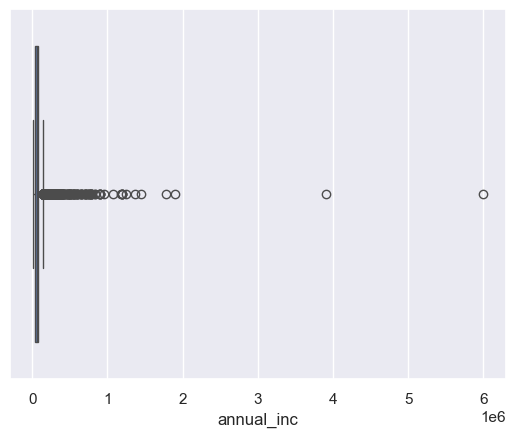

In [45]:
# Data distribution indicates presents of outliers, explore the range of outliers using box plot
sns.boxplot(x=loans.annual_inc)
plt.show()

In [46]:
# Determine the percentile of outliers
loans.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50    59000.00
0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   186000.00
0.99   234000.00
Name: annual_inc, dtype: float64

In [47]:
# OUtliers are above the 97th percentile, remove them
loans = loans[loans.annual_inc <= loans.annual_inc.quantile(0.97)]
loans.shape

(36709, 31)

In [48]:
# Group customer by income groups as Low Income, Lower Middle Income, Middle Income, Upper Middle Income, High Income Groups
loans.inc_group = pd.qcut(loans.annual_inc, q=5, labels=['LIG','LMIG','MIG', 'UMIG', 'HIG'])
loans.inc_group.value_counts()

annual_inc
MIG     7575
LMIG    7543
LIG     7487
HIG     7340
UMIG    6764
Name: count, dtype: int64

In [49]:
# Reset the index
#loans = loans.reset_index(drop=True)

In [144]:
loans.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,emp_tenure,l_to_i_ratio,issue_y,issue_m,emp_postn
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.70,9,5863.16,171.62,0.00,10,0.21,2011,12,Senior
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,1687,9.40,4,1008.71,119.66,0.00,0,0.08,2011,12,NaN
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.50,10,3005.67,649.91,0.00,10,0.20,2011,12,Senior
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,5598,21.00,37,12231.89,357.48,0.00,10,0.20,2011,12,Senior
5,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,3,9,0,7963,28.30,12,5632.21,161.03,0.00,3,0.14,2011,12,Junior


## Univariate Analysis

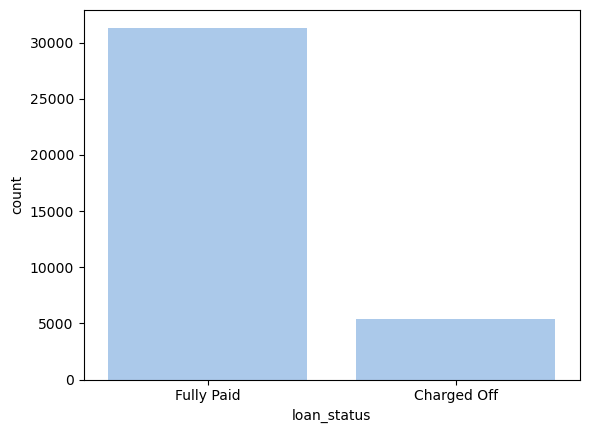

In [52]:
sns.reset_orig()
sns.set_palette('pastel', n_colors=7)
sns.countplot(x = 'loan_status', data = loans)
plt.show()

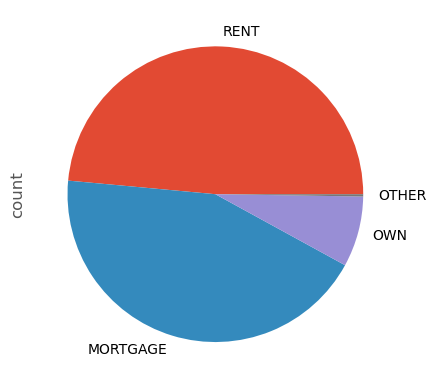

In [156]:
plt.style.use('ggplot')
loans.home_ownership.value_counts().plot.pie()
plt.show()

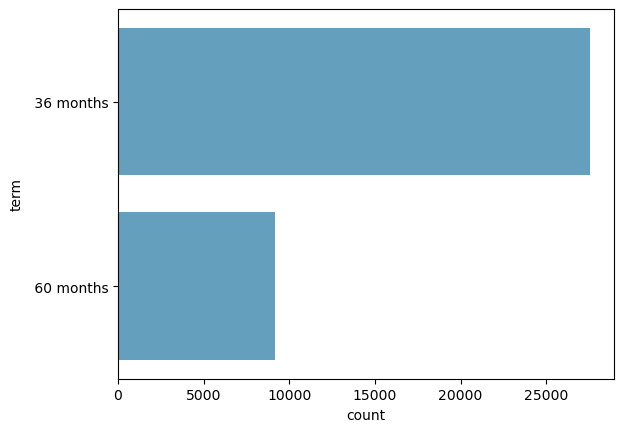

In [150]:
sns.countplot(loans.term)
plt.show()

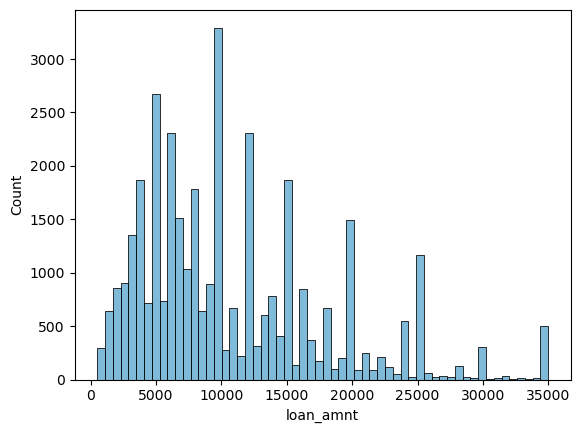

In [142]:
sns.set_palette('icefire')
sns.histplot(loans.loan_amnt)
plt.show()

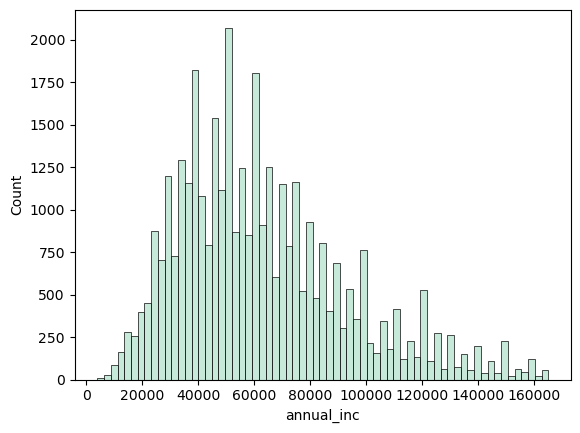

In [112]:
sns.set_palette('Pastel2', n_colors=7)
sns.histplot(loans.annual_inc)
plt.show()

In [164]:
sns.countplot(loans[loan_status == 'Charged Off'].inc_group)
plt.show()

NameError: name 'loan_status' is not defined